## Importer les librairies nécessaires

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Références bibliographiques


* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.



## Produire les observations

Cf. Hamon, p.4, tableau 1.1

Afin de reproduire ce tableau, on utilise des fonctions produisant des valeur aléatoires.

* On produit d'abord les valeurs aléatoires (remplaçant les observations) pour chaque variable
* On les regroupe ensuite dans un dataframe Pandas
* 130 individus fictifs ont été créés

In [ ]:
### Créer une liste d'identifiants
id_list = []
[id_list.append(x) for x in range(1,131)]

print(id_list[-5:])
len(id_list)

In [ ]:
### Créer une liste d'âges
age_list = []
for x in range(1,131):
    age_list.append(random.randint(18,90))

print(age_list[:5])
len(age_list)

In [ ]:
### Créer une liste de nombre de personne dans un foyer
nfoyer_list = []
for x in range(1,131): 
    nfoyer_list.append(random.randint(1,7))

print(nfoyer_list[:5])
len(nfoyer_list)

In [ ]:
### Créer une liste de fréquences de lecture des journaux
lecture_list = []
for x in range(1,131): 
    lecture_list.append(random.choice(['tous les jours', 'de temps en temps', 'très rarement', 'trois-quatre fois par semaine', 'le week-end']))

print(lecture_list[:5])
len(lecture_list)

In [ ]:
### Créer une liste d'orientations politiques
politique_list = []
for x in range(1,131): 
    politique_list.append(random.choice(['gauche', 'écologiste', 'droite', 'centre', 'populiste']))

print(politique_list[:5])
len(politique_list)

In [ ]:
### Créer une liste de revenus mensuels
revenu_list = []
for x in range(1,131): 
    revenu_list.append(random.randint(2500,12000))

print(revenu_list[:5])
len(revenu_list)

### Création du dataframe

In [ ]:
#  https://www.statology.org/add-column-pandas-dataframe/

observations = pd.DataFrame({'id' : id_list, 'age' : age_list, 'n_foyer' : nfoyer_list, 
                             'lecture_journal' : lecture_list, 'parti' : politique_list, 
                             'revenu_mensuel' : revenu_list})

In [ ]:
print(len(observations))
observations.head()

In [ ]:
observations.set_index('id', inplace=True)
observations.head()

In [ ]:
### Ecrire le fichier sur le disque afin de le corriger manuellement

path = 'data/observations.csv'
observations.to_csv(path)

## Analyser les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
obs = observations_mod
#obs = observations # 900
len(obs)

130

In [4]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = True)
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   17
très rarement                    30
le week-end                      31
trois-quatre fois par semaine    35
dtype: int64

In [5]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
droite        18
gauche        23
centre        25
populiste     27
écologiste    37
dtype: int64

In [6]:
df_partis = pd.DataFrame(sgb_parti)
df_partis.reset_index(inplace=True)
df_partis

,parti,0
0,droite,18
1,gauche,23
2,centre,25
3,populiste,27
4,écologiste,37


In [7]:
df_partis.columns = ['parti','effectif']
df_partis['code_parti'] = [4,2,5,3,1]
# df_partis.reset_index('parti').set_index('code_parti')
df_partis

,parti,effectif,code_parti
0,droite,18,4
1,gauche,23,2
2,centre,25,5
3,populiste,27,3
4,écologiste,37,1


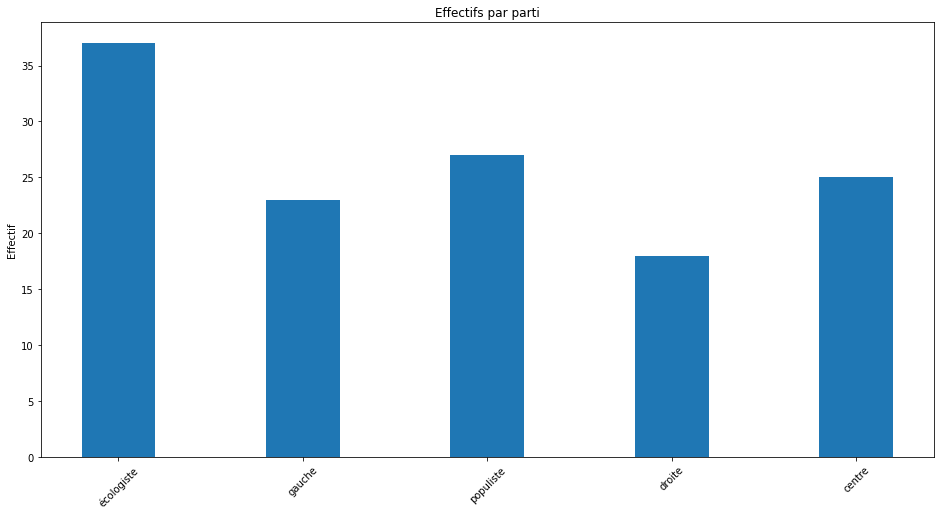

In [8]:
# Distribution par parti

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]



p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [9]:
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   17
très rarement                    30
le week-end                      31
trois-quatre fois par semaine    35
dtype: int64

In [10]:
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [2,5,1,3,4]
df_lecture_journal

,lecture,effectif,code_lecture
0,de temps en temps,17,2
1,tous les jours,17,5
2,très rarement,30,1
3,le week-end,31,3
4,trois-quatre fois par semaine,35,4


In [11]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
df_lecture_journal

,lecture,effectif,code_lecture
2,très rarement,30,1
0,de temps en temps,17,2
3,le week-end,31,3
4,trois-quatre fois par semaine,35,4
1,tous les jours,17,5


In [12]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
2,très rarement,30,1,30
0,de temps en temps,17,2,47
3,le week-end,31,3,78
4,trois-quatre fois par semaine,35,4,113
1,tous les jours,17,5,130


In [13]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
2,très rarement,30,1,30,23.08
0,de temps en temps,17,2,47,13.08
3,le week-end,31,3,78,23.85
4,trois-quatre fois par semaine,35,4,113,26.92
1,tous les jours,17,5,130,13.08


In [14]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,très rarement,30,1,30,23.08,23.08
0,de temps en temps,17,2,47,13.08,36.15
3,le week-end,31,3,78,23.85,60.00
4,trois-quatre fois par semaine,35,4,113,26.92,86.92
1,tous les jours,17,5,130,13.08,100.00


In [15]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,très rarement,30,1,30,23.08,23.08
0,de temps en temps,17,2,47,13.08,36.15
3,le week-end,31,3,78,23.85,60.00
4,trois-quatre fois par semaine,35,4,113,26.92,86.92
1,tous les jours,17,5,130,13.08,100.00


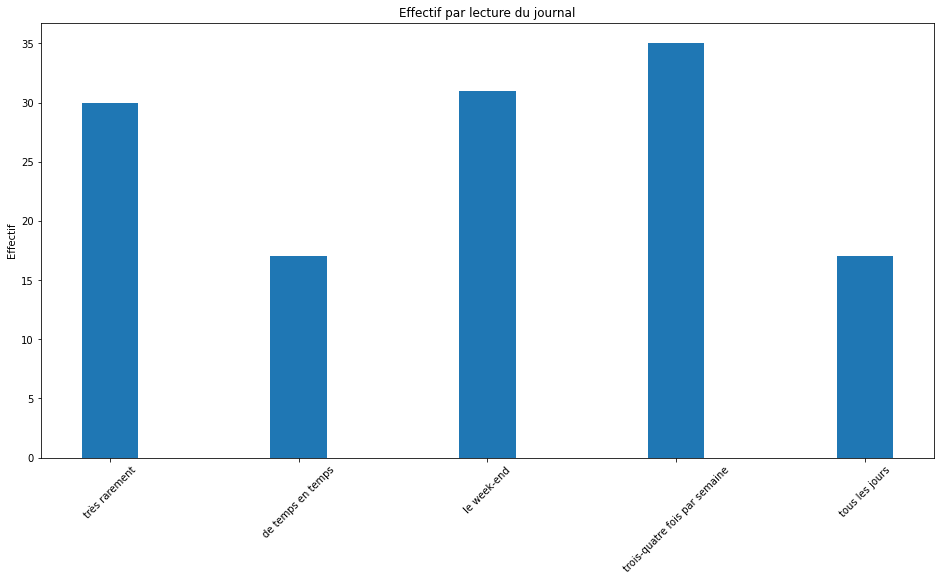

In [16]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


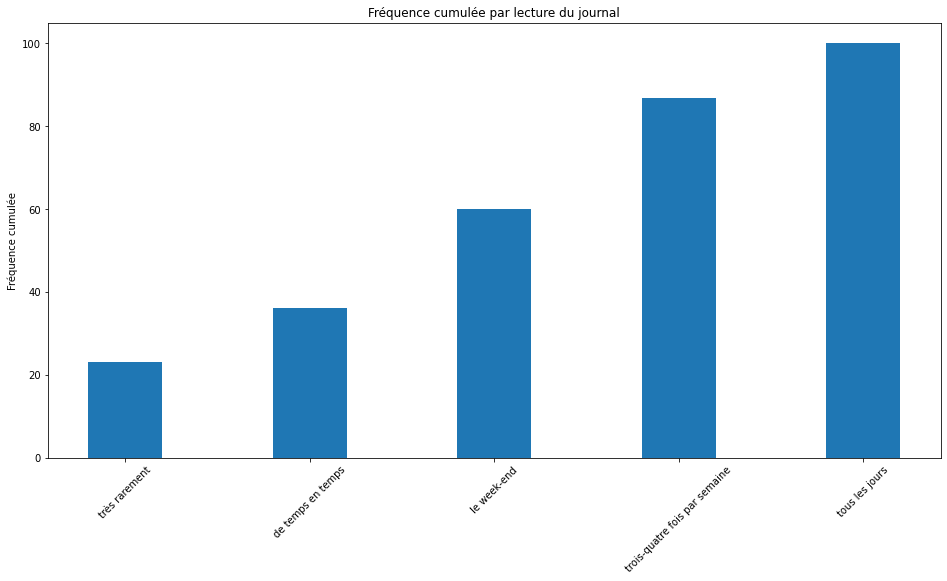

In [17]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Paramètres de centralité et de dispersion

In [18]:
obs['age'].describe()

count    130.000000
mean      49.553846
std       20.757015
min       18.000000
25%       31.000000
50%       45.000000
75%       68.000000
max       90.000000
Name: age, dtype: float64

<AxesSubplot:>

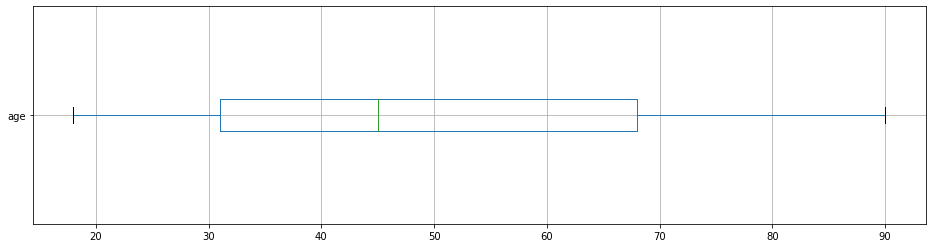

In [19]:
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

## Variable quantitative continuer, à classer

In [20]:
obs['age'].mode()

0    74
dtype: int64

In [21]:
len(obs[obs['age'] == 74]['age'])

6

In [22]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [0, 21, 41, 61, 81, 101]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[41, 61)"
2,45,1,tous les jours,droite,7364,"[41, 61)"
3,54,3,de temps en temps,droite,8947,"[41, 61)"
4,86,2,tous les jours,populiste,6317,"[81, 101)"
5,77,2,tous les jours,gauche,6511,"[61, 81)"


In [23]:
### Transformer le code ajouté pour qu'il soit plus lisible
c_obs['generation'] = c_obs['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,41-61
2,45,1,tous les jours,droite,7364,41-61
3,54,3,de temps en temps,droite,8947,41-61
4,86,2,tous les jours,populiste,6317,81-101
5,77,2,tous les jours,gauche,6511,61-81


In [24]:
### Alternative : regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
gb_generation = pd.DataFrame(c_obs.groupby('generation').size())
gb_generation.columns = ['effectif']
gb_generation

,effectif
generation,
0-21,7
21-41,47
41-61,33
61-81,33
81-101,10


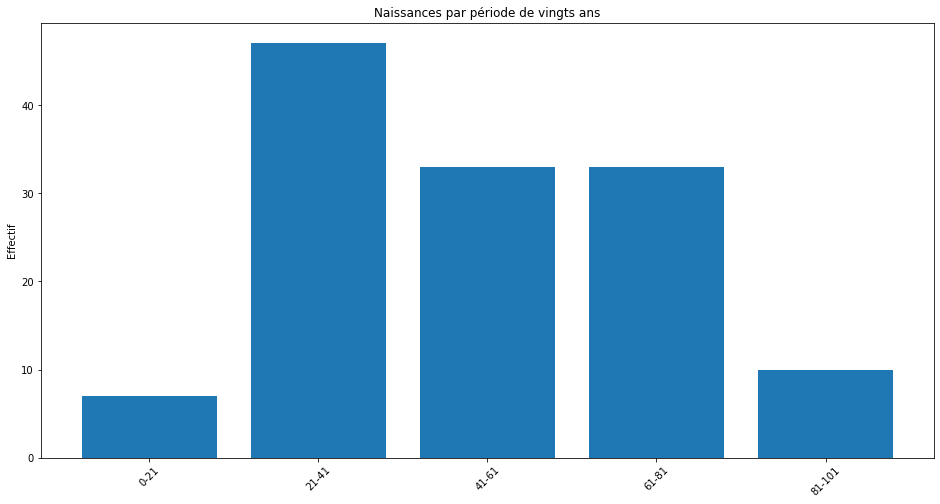

In [25]:
# Distribution par période de 20 ans – cf. dbpedia_analyse_nationalites pour la visualisation interactive des nationalités

objects = [l for l in gb_generation.index]
eff = [l for l in gb_generation['effectif']]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title('Naissances par période de vingts ans')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Comparaison de deux variables quantiatives

In [26]:
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [27]:
obs['n_foyer'].describe()

count    130.000000
mean       2.153846
std        1.171109
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: n_foyer, dtype: float64

<AxesSubplot:>

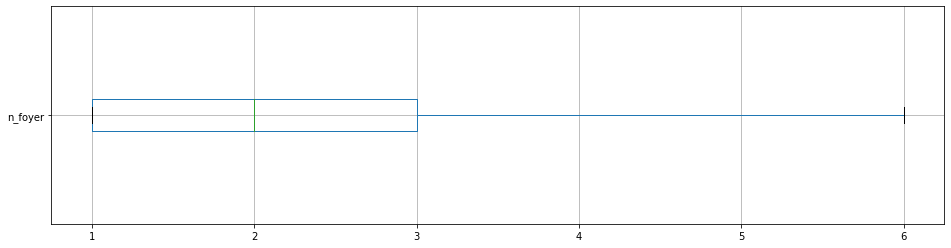

In [28]:
obs.boxplot(column=['n_foyer'], vert=False, figsize=(16,4))

In [29]:
obs['revenu_mensuel'].describe()

count      130.000000
mean      7004.684615
std       2528.858857
min       1400.000000
25%       5007.000000
50%       7331.500000
75%       8996.750000
max      11728.000000
Name: revenu_mensuel, dtype: float64

<AxesSubplot:>

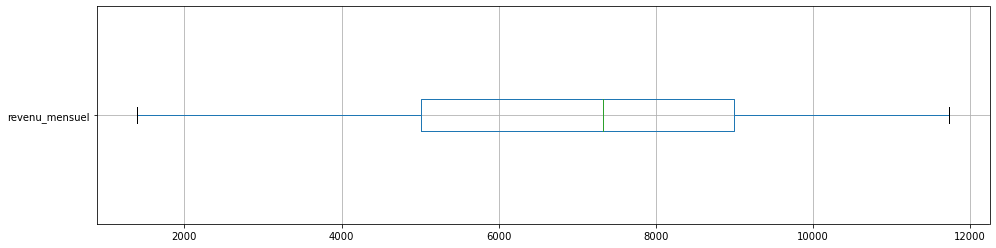

In [30]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

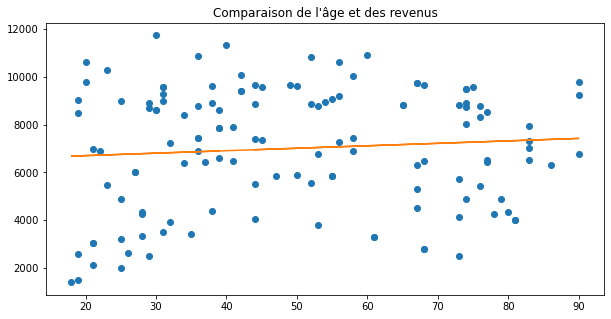

In [31]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [32]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.08430365209492545

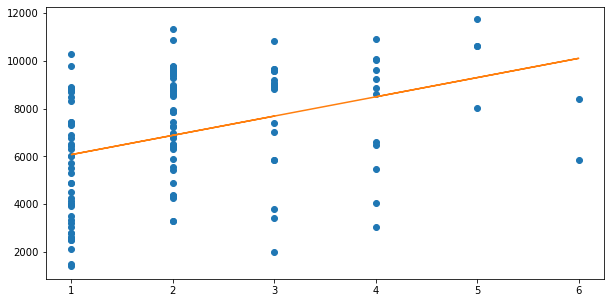

In [33]:
x = np.array(obs['n_foyer'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

In [35]:
np.corrcoef([x,y])[0][1]

0.3725719117996519

Text(0, 0.5, 'Parti politique')

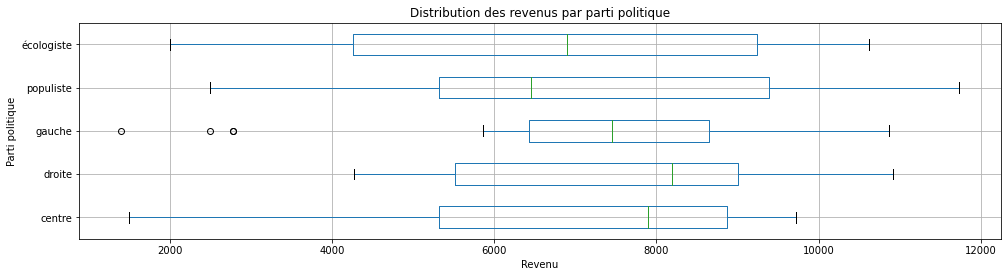

In [36]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4))

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


In [37]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       27.000000
mean      7038.074074
std       2599.633553
min       2500.000000
25%       5321.000000
50%       6453.000000
75%       9388.500000
max      11728.000000
Name: revenu_mensuel, dtype: float64